In [1]:
%matplotlib inline
import utils; reload(utils)
from utils import *

/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [2]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data

In [3]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

In [4]:
path = "data/"
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [5]:
batch_size = 16

In [6]:
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

In [7]:
batches = get_batches(path+'train/',shuffle = False, batch_size= 1)
val_batches = get_batches(path+'valid/', shuffle = False, batch_size = 1)

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


In [72]:
trn_data = get_data(path+'train/')
val_data = get_data(path+'valid/')

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


In [8]:
val_classes = val_batches.classes
trn_classes = batches.classes

In [9]:
val_labels = onehot(val_classes)
trn_labels= onehot(trn_classes)

Get VGG-16 results from training data for 1000 classes.

In [15]:
batches.N
val_batches.N

7500

In [16]:
trn_features = model.predict_generator(batches, val_samples=batches.N)
val_features = model.predict_generator(val_batches, val_samples = val_batches.N)

In [18]:
lm = Sequential([Dense(2, activation = 'softmax',input_shape = (1000,))])
lm.compile(Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
lm.fit(trn_features, trn_labels, nb_epoch = 3, batch_size = batch_size, validation_data = (val_features, val_labels))

Train on 17500 samples, validate on 7500 samples
Epoch 1/3
17500/17500 [==============================] - 2s - loss: 0.5004 - acc: 0.9497 - val_loss: 0.3614 - val_acc: 0.9640
Epoch 2/3
17500/17500 [==============================] - 2s - loss: 0.2884 - acc: 0.9630 - val_loss: 0.2315 - val_acc: 0.9632
Epoch 3/3
17500/17500 [==============================] - 2s - loss: 0.1975 - acc: 0.9639 - val_loss: 0.1705 - val_acc: 0.9660


In [20]:
lm.optimizer.lr = 0.01

In [21]:
lm.fit(trn_features, trn_labels, nb_epoch = 3, batch_size = batch_size, validation_data = (val_features, val_labels))

Train on 17500 samples, validate on 7500 samples
Epoch 1/3
17500/17500 [==============================] - 2s - loss: 0.1514 - acc: 0.9655 - val_loss: 0.1377 - val_acc: 0.9665
Epoch 2/3
17500/17500 [==============================] - 2s - loss: 0.1252 - acc: 0.9666 - val_loss: 0.1185 - val_acc: 0.9673
Epoch 3/3
17500/17500 [==============================] - 2s - loss: 0.1089 - acc: 0.9677 - val_loss: 0.1066 - val_acc: 0.9675


In [22]:
lm.optimizer.lr = 0.1

In [23]:
lm.fit(trn_features, trn_labels, nb_epoch = 3, batch_size = batch_size, validation_data = (val_features, val_labels))

Train on 17500 samples, validate on 7500 samples
Epoch 1/3
17500/17500 [==============================] - 2s - loss: 0.0983 - acc: 0.9686 - val_loss: 0.0989 - val_acc: 0.9684
Epoch 2/3
17500/17500 [==============================] - 2s - loss: 0.0911 - acc: 0.9690 - val_loss: 0.0938 - val_acc: 0.9684
Epoch 3/3
17500/17500 [==============================] - 2s - loss: 0.0861 - acc: 0.9698 - val_loss: 0.0902 - val_acc: 0.9688


In [27]:
probs = lm.predict_proba(val_features, batch_size = batch_size)
preds = lm.predict_classes(val_features, batch_size = batch_size)

7072/7500 [===========================>..] - ETA: 0s

In [30]:
probs = probs[:,0]

In [35]:
probs[:20]

array([ 0.9434,  0.9088,  0.9985,  0.9995,  0.9646,  0.9997,  0.9984,  0.9993,  0.998 ,  0.9997,
        0.9997,  0.9987,  0.9997,  0.9996,  0.9995,  0.9982,  0.9995,  0.9994,  0.9997,  0.2765], dtype=float32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
filenames = val_batches.filenames

In [42]:
n_view = 4

In [43]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

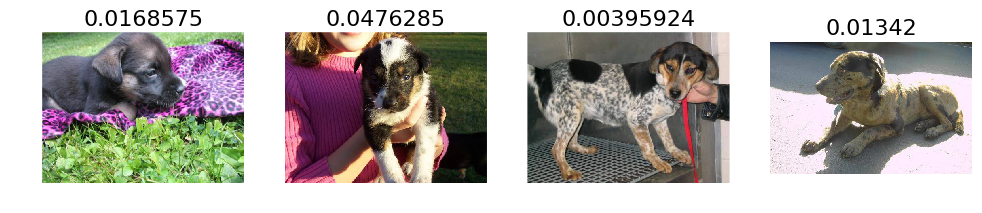

In [47]:
correct = np.where(preds==val_labels[:,1])[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

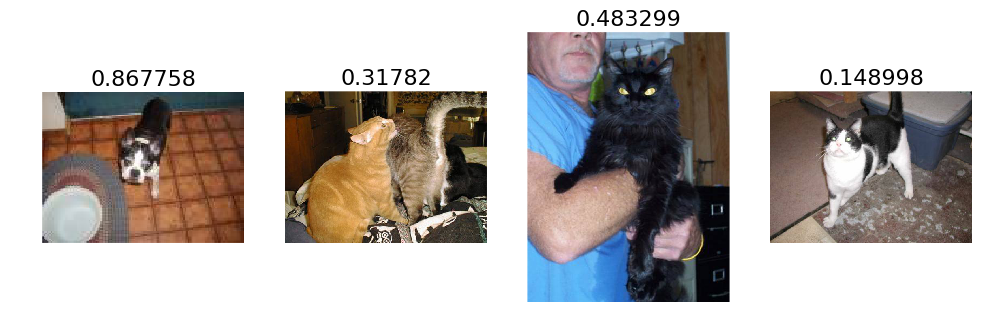

In [57]:
incorrect = np.where(preds!=val_labels[:,1])[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

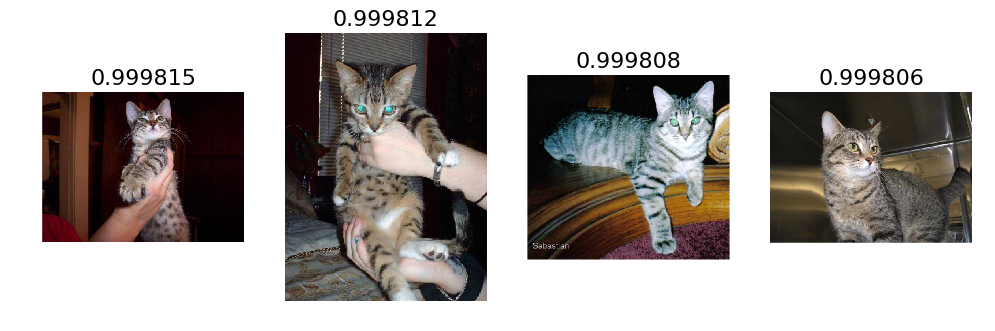

In [59]:
#3. The images we most confident were cats, and are actually cats
correct_cats = np.where((preds==0) & (preds==val_labels[:,1]))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

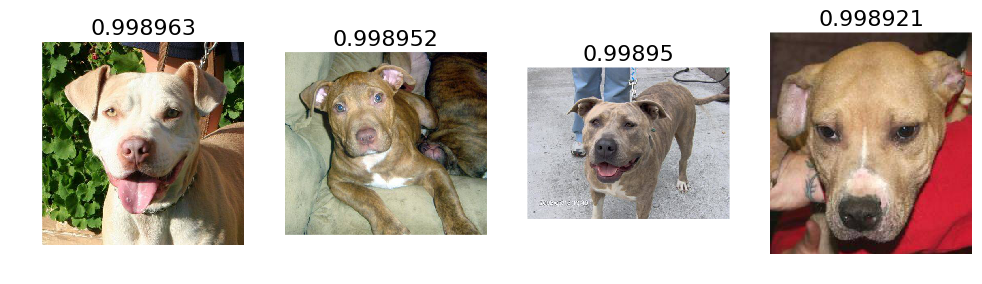

In [64]:
correct_dogs = np.where((preds==1) & (preds==val_labels[:,1]))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], 1-probs[correct_dogs][most_correct_dogs])

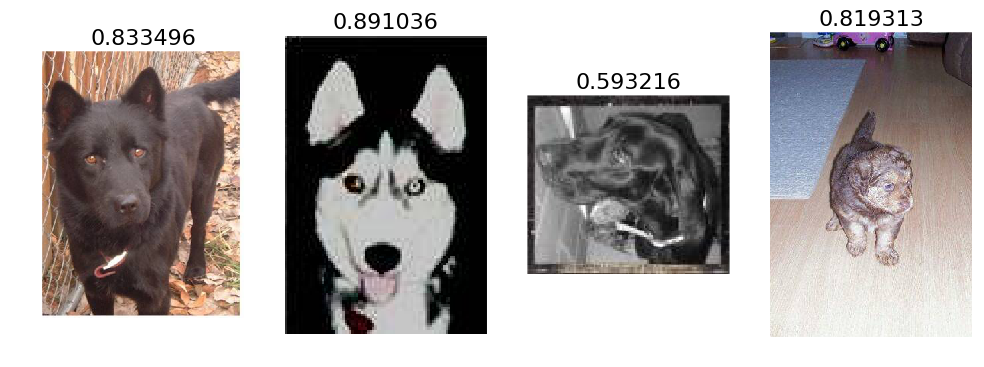

In [65]:
incorrect_cats = np.where((preds==0) & (preds!=val_labels[:,1]))[0]
idx = permutation(incorrect_cats)[:n_view]
plots_idx(idx, probs[idx])

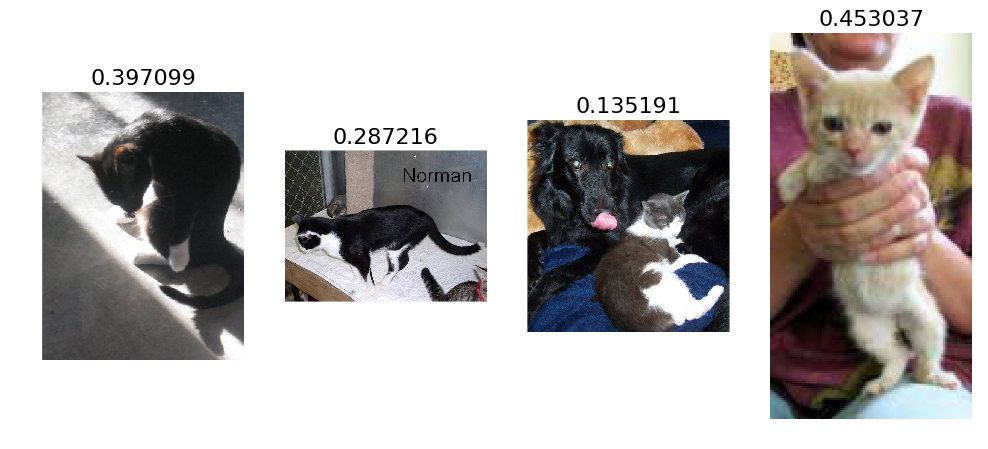

In [66]:
incorrect_cats = np.where((preds==1) & (preds!=val_labels[:,1]))[0]
idx = permutation(incorrect_cats)[:n_view]
plots_idx(idx, probs[idx])

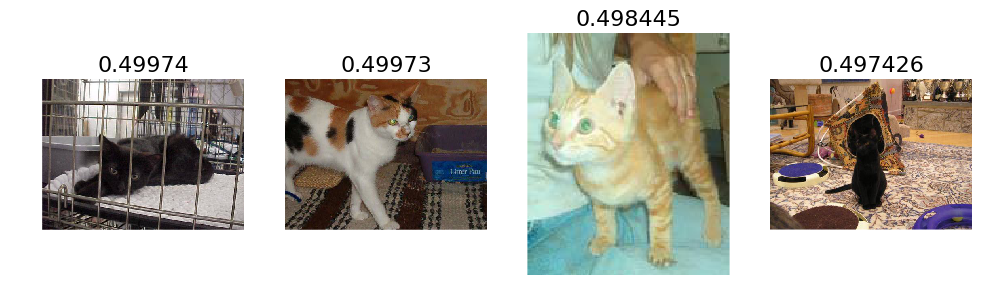

In [67]:
most_uncertain = np.argsort(np.abs(probs-0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])

[[3585  165]
 [  69 3681]]


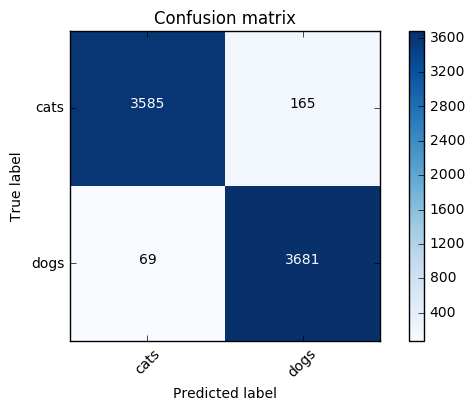

In [68]:
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, val_batches.class_indices)

## VGG Finetuning

In [69]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [70]:
model.pop()
for layer in model.layers: layer.trainable=False

In [71]:
model.add(Dense(2, activation='softmax'))

In [73]:
gen = image.ImageDataGenerator()
batches = gen.flow(trn_data, trn_labels, batch_size = batch_size , shuffle = True)
val_batches = gen.flow(val_data, val_labels, batch_size = batch_size , shuffle = True)

In [77]:
def fit_model(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, samples_per_epoch=batches.N, nb_epoch=nb_epoch, 
                        validation_data=val_batches, nb_val_samples=val_batches.N)

In [78]:
model.compile(optimizer= Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [79]:
fit_model(model, batches, val_batches, nb_epoch = 2)

Epoch 1/2
17500/17500 [==============================] - 607s - loss: 0.1384 - acc: 0.9701 - val_loss: 0.0978 - val_acc: 0.9816
Epoch 2/2
17500/17500 [==============================] - 609s - loss: 0.1396 - acc: 0.9767 - val_loss: 0.2064 - val_acc: 0.9689


In [81]:
model.save_weights(model_path+'finetune1.h5')

## Retrain More than Last Layer

In [82]:
layers = model.layers

In [83]:
layers

In [93]:
first_dense_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense][0]

In [94]:
first_dense_idx

33

In [95]:
for layer in layers[first_dense_idx:]:
    layer.trainable = True

In [96]:
model.optimizer.lr = 0.01

In [97]:
fit_model(model, batches, val_batches, 3)

Epoch 1/3
17500/17500 [==============================] - 607s - loss: 0.1621 - acc: 0.9782 - val_loss: 0.1245 - val_acc: 0.9827
Epoch 2/3
17500/17500 [==============================] - 609s - loss: 0.1523 - acc: 0.9799 - val_loss: 0.1270 - val_acc: 0.9823
Epoch 3/3
17500/17500 [==============================] - 609s - loss: 0.1410 - acc: 0.9817 - val_loss: 0.1320 - val_acc: 0.9832


In [98]:
model.save_weights(model_path+'finetune2.h5')

In [102]:
first_conv_layer = [index for index, layer in enumerate(layers) if type(layer) is Convolution2D ]

In [103]:
first_conv_layer

[2, 4, 7, 9, 12, 14, 16, 19, 21, 23, 26, 28, 30]

In [105]:
for layer in layers[14:]:
    layer.trainable = True

In [106]:
model.optimizer.lr = 0.001

In [107]:
fit_model(model, batches, val_batches, 3)

Epoch 1/3
17500/17500 [==============================] - 607s - loss: 0.1500 - acc: 0.9812 - val_loss: 0.1539 - val_acc: 0.9817
Epoch 2/3
17500/17500 [==============================] - 608s - loss: 0.1715 - acc: 0.9811 - val_loss: 0.1419 - val_acc: 0.9841
Epoch 3/3
17500/17500 [==============================] - 608s - loss: 0.1429 - acc: 0.9843 - val_loss: 0.1627 - val_acc: 0.9827


In [108]:
model.save_weights(model_path+'finetune3.h5')

In [7]:
model.load_weights(model_path+'finetune3.h5')

In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [9]:
test_batches = get_batches(path+'/test', shuffle = False, batch_size = 32)

Found 12500 images belonging to 1 classes.


In [10]:
predictions = model.predict_generator(test_batches , test_batches.N)

In [11]:
filenames = test_batches.filenames

In [12]:
filenames[:5]

['unknown/9292.jpg',
 'unknown/12026.jpg',
 'unknown/9688.jpg',
 'unknown/4392.jpg',
 'unknown/779.jpg']

In [13]:
for idx,filename in enumerate(filenames):
    filename = filename[8:]
    filename = filename[:-4]
    filenames[idx] = filename 

In [14]:
filenames[:5]

['9292', '12026', '9688', '4392', '779']

In [15]:
test_batches.N

12500

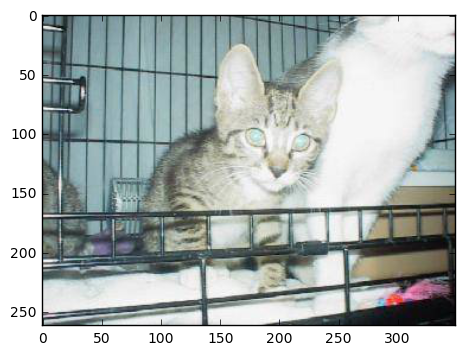

In [16]:
image = scipy.ndimage.imread(path+'/test/unknown/'+filenames[0]+'.jpg')
plt.imshow(image)

In [17]:
isDog = predictions[:,1]

In [18]:
isDog[:5]

array([  1.7008e-40,   6.9445e-01,   1.2150e-25,   0.0000e+00,   1.0000e+00], dtype=float32)

In [19]:
x = np.clip(isDog,0.01,0.99)

In [20]:
x[:5]

array([ 0.01  ,  0.6944,  0.01  ,  0.01  ,  0.99  ], dtype=float32)

In [21]:
filenames[:5]

['9292', '12026', '9688', '4392', '779']

In [22]:
import pandas as pd

In [29]:
z = pd.DataFrame({'id': filenames, 'label': x})

In [30]:
z.head()

,id,label
0,9292,0.01000
1,12026,0.69445
2,9688,0.01000
3,4392,0.01000
4,779,0.99000


In [32]:
z.to_csv('Cats_vs_Dogs_retrain.csv',index = None)

In [33]:
from IPython.display import FileLink

In [34]:
FileLink('Cats_vs_Dogs_retrain.csv')

/data/home/ubuntu/cats-vs-dogs/Cats_vs_Dogs_retrain.csv